# Linear Algebra: Eigenvalues and Eigenvectors Part 1

This notebook generates visualizations for the blog post on eigenvalues and eigenvectors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Basic Eigenvalue Computation

In [2]:
# Example: A simple 2x2 matrix
A = np.array([[3, 1],
              [0, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"Matrix A:\n{A}\n")
print(f"Eigenvalues: {eigenvalues}")
print(f"\nEigenvectors (as columns):\n{eigenvectors}")

Matrix A:
[[3 1]
 [0 2]]

Eigenvalues: [3. 2.]

Eigenvectors (as columns):
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


In [3]:
# Verify: A @ v = lambda * v
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]

    Av = A @ v
    lam_v = lam * v

    print(f"Eigenvalue {i+1}: lambda = {lam}")
    print(f"  Eigenvector: {v}")
    print(f"  A @ v = {Av}")
    print(f"  lambda * v = {lam_v}")
    print(f"  Equal: {np.allclose(Av, lam_v)}\n")

Eigenvalue 1: lambda = 3.0
  Eigenvector: [1. 0.]
  A @ v = [3. 0.]
  lambda * v = [3. 0.]
  Equal: True

Eigenvalue 2: lambda = 2.0
  Eigenvector: [-0.70710678  0.70710678]
  A @ v = [-1.41421356  1.41421356]
  lambda * v = [-1.41421356  1.41421356]
  Equal: True



## Geometric Interpretation

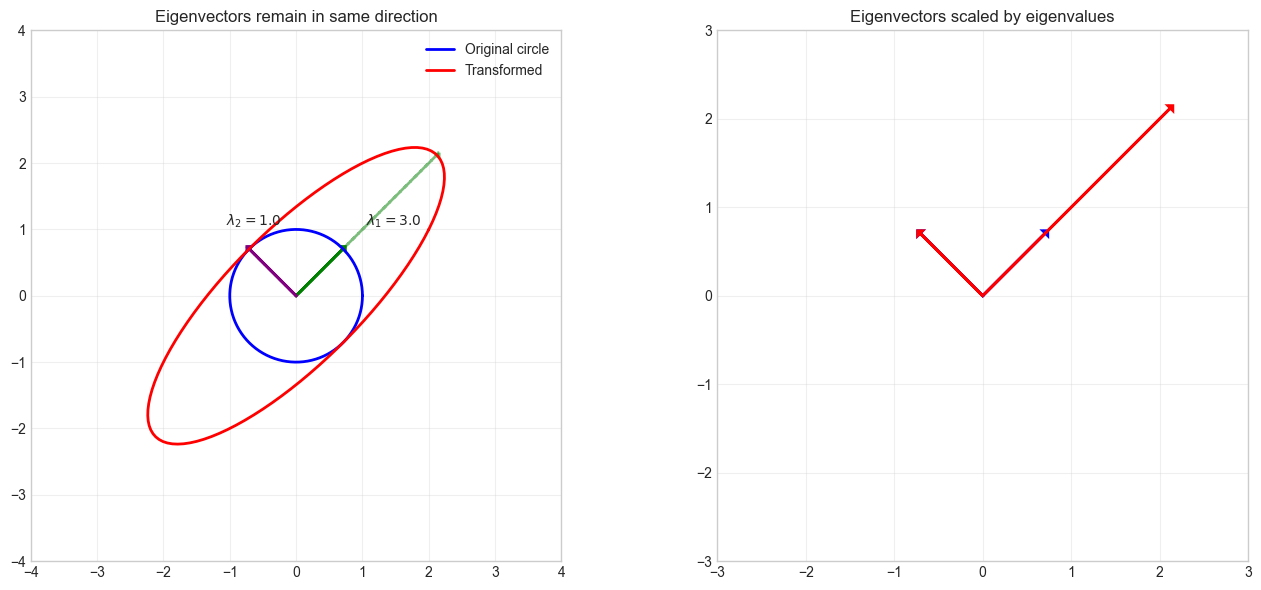

Eigenvalues: [3. 1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [4]:
# Create a matrix with clear eigenvector directions
B = np.array([[2, 1],
              [1, 2]])

eigenvalues_B, eigenvectors_B = np.linalg.eig(B)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Generate a circle of unit vectors
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
circle = np.vstack([circle_x, circle_y])

# Transform the circle
transformed = B @ circle

# Plot original and transformed
ax1 = axes[0]
ax1.plot(circle_x, circle_y, 'b-', linewidth=2, label='Original circle')
ax1.plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')

# Plot eigenvectors
colors = ['green', 'purple']
for i in range(2):
    v = eigenvectors_B[:, i]
    lam = eigenvalues_B[i]
    ax1.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.05,
              fc=colors[i], ec=colors[i], linewidth=2)
    ax1.arrow(0, 0, lam*v[0], lam*v[1], head_width=0.1, head_length=0.05,
              fc=colors[i], ec=colors[i], linewidth=2, linestyle='--', alpha=0.5)
    ax1.annotate(f'$\\lambda_{i+1}={lam:.1f}$', xy=(v[0]*1.5, v[1]*1.5))

ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Eigenvectors remain in same direction')

# Plot eigenvalue scaling
ax2 = axes[1]
for i in range(2):
    v = eigenvectors_B[:, i]
    lam = eigenvalues_B[i]
    ax2.arrow(0, 0, v[0], v[1], head_width=0.08, head_length=0.04,
              fc='blue', ec='blue', linewidth=2, label=f'v_{i+1}' if i==0 else '')
    ax2.arrow(0, 0, lam*v[0], lam*v[1], head_width=0.08, head_length=0.04,
              fc='red', ec='red', linewidth=2, label=f'A*v_{i+1}' if i==0 else '')

ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Eigenvectors scaled by eigenvalues')

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/eigenvalues-geometric.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Eigenvalues: {eigenvalues_B}")
print(f"Eigenvectors:\n{eigenvectors_B}")

## Properties of Eigenvalues

In [5]:
C = np.array([[4, 2, 1],
              [1, 3, 1],
              [2, 1, 5]])

eigenvalues_C, _ = np.linalg.eig(C)

print(f"Matrix C:\n{C}\n")
print(f"Eigenvalues: {eigenvalues_C}")
print(f"Sum of eigenvalues: {np.sum(eigenvalues_C):.6f}")
print(f"Trace of C: {np.trace(C)}")
print(f"\nProduct of eigenvalues: {np.prod(eigenvalues_C):.6f}")
print(f"Determinant of C: {np.linalg.det(C):.6f}")

Matrix C:
[[4 2 1]
 [1 3 1]
 [2 1 5]]

Eigenvalues: [6.79128785 3.         2.20871215]
Sum of eigenvalues: 12.000000
Trace of C: 12

Product of eigenvalues: 45.000000
Determinant of C: 45.000000


## Symmetric Matrices

In [6]:
# Symmetric matrix
S = np.array([[4, 2, 2],
              [2, 5, 1],
              [2, 1, 6]])

eigenvalues_S, eigenvectors_S = np.linalg.eig(S)

print(f"Symmetric matrix S:\n{S}\n")
print(f"Eigenvalues (all real): {eigenvalues_S}\n")
print(f"Eigenvectors:\n{eigenvectors_S}\n")

# Check orthogonality
print("Dot products between eigenvectors:")
for i in range(3):
    for j in range(i+1, 3):
        dot = np.dot(eigenvectors_S[:, i], eigenvectors_S[:, j])
        print(f"  v{i+1} . v{j+1} = {dot:.10f}")

Symmetric matrix S:
[[4 2 2]
 [2 5 1]
 [2 1 6]]

Eigenvalues (all real): [8.38761906 2.12592447 4.48645647]

Eigenvectors:
[[ 0.53867823  0.82803335 -0.15552024]
 [ 0.51488378 -0.46965459 -0.71716055]
 [ 0.66687365 -0.30624393  0.67933364]]

Dot products between eigenvectors:
  v1 . v2 = -0.0000000000
  v1 . v3 = 0.0000000000
  v2 . v3 = -0.0000000000
